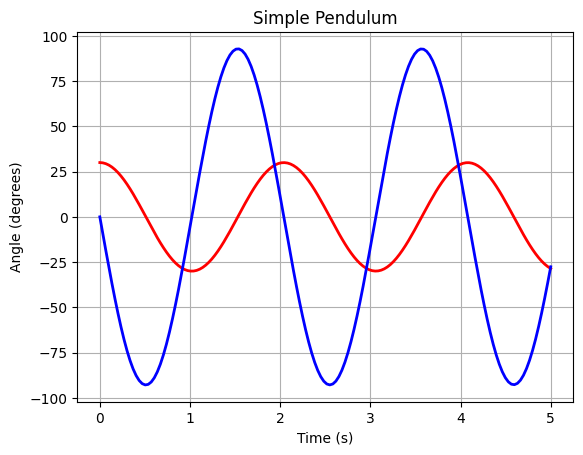

In [20]:
import numpy as np
from IPython.display import Video
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.rcParams['animation.ffmpeg_path'] = r'C:\ffmpeg\ffmpeg-2024-08-15-git-1f801dfdb5-full_build\bin\ffmpeg.exe'


g = 9.81
ell = 1

theta0 = np.deg2rad(30)
theta_dot0 = 0

# System of DEs, y[0] = theta, y[1] = theta_dot
def pendulum_ODE(t, y):
    return (y[1], -g*np.sin(y[0])/ell)

# Solve the ODE
sol = solve_ivp(pendulum_ODE, [0, 5], (theta0, theta_dot0), t_eval=np.linspace(0, 5, 30*5))

# Output of solver
theta = sol.y[0]
theta_dot = sol.y[1]
t = sol.t

# Convert to degrees
theta_deg = np.rad2deg(sol.y[0])
theta_dot_deg = np.rad2deg(sol.y[1])

# Optional: save theta_deg in a CSV file
np.savetxt('pend.csv', np.transpose([theta_deg, theta_dot_deg]), delimiter=',')

# Plot graph
plt.plot(t, theta_deg, 'r', lw=2, label=r'$\theta$')
plt.plot(t, theta_dot_deg, 'b', lw=2, label=r'$\dot \theta$')
plt.title('Simple Pendulum')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.grid()
plt.show()

# Animation
fig, ax = plt.subplots()
theta_curve, = ax.plot([], [], 'r')  # Comma to unpack the line object
theta_dot_curve, = ax.plot([], [], 'b')  # Comma to unpack the line object
ax.set_title('Simple Pendulum: angular position, velocity vs time')
ax.set_xlim(0, t[-1])
ax.set_ylim(-100, 100)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Angle (degrees)')
ax.legend([r'$\theta$', r'$\dot \theta$'])
ax.grid()

def animate(i):
    theta_curve.set_data(t[:i+1], theta_deg[:i+1])
    theta_dot_curve.set_data(t[:i+1], theta_dot_deg[:i+1])
    return theta_curve, theta_dot_curve  # Return the updated artists

# Save the animation
ani = animation.FuncAnimation(fig, animate, frames=len(t), interval=100, repeat=False)
ffmpeg_writer = animation.FFMpegWriter(fps=30)  # Corrected variable name
ani.save(r'C:\Users\Daniel\OneDrive\Desktop\Coding\time_domain.mp4', writer=ffmpeg_writer)
plt.close(fig)
Video(r'C:\Users\Daniel\OneDrive\Desktop\Coding\time_domain.mp4', embed=True)


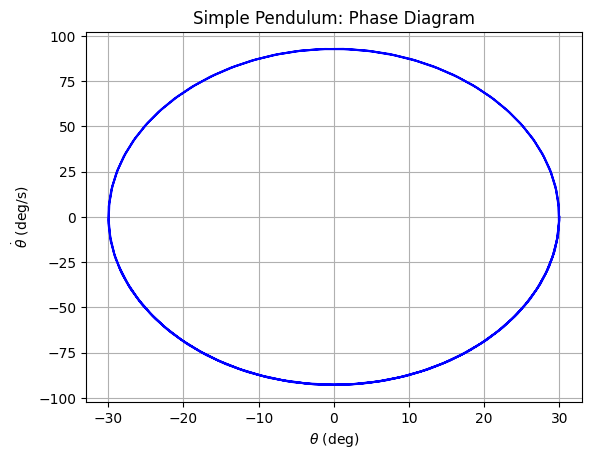

In [21]:
plt.plot(theta_deg, theta_dot_deg, 'b')
plt.title('Simple Pendulum: Phase Diagram')
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel(r'$\dot \theta$ (deg/s)')
plt.grid()
plt.show()

In [25]:
#animate the phase diagram
fig, ax = plt.subplots()

phase_curve, = ax.plot(theta_deg[0], theta_dot_deg[0], 'b')
phase_dot, = ax.plot(theta_deg[0], theta_dot_deg[0], 'ro')

ax.set_title('Simple Pendulum: Phase Diagram')
ax.set_xlabel(r'$\theta$ (deg)')
ax.set_ylabel(r'$\dot \theta$ (deg/s)')
ax.set_xlim(-35, 35)
ax.set_ylim(-100, 100)
ax.grid()

def animate(i):
    phase_curve.set_data(theta_deg[:i+1], theta_dot_deg[:i+1])
    phase_dot.set_data([theta_deg[i]], [theta_dot_deg[i]])
    return phase_curve, phase_dot
    
ani = animation.FuncAnimation(fig, animate, frames=len(t), interval=100, repeat=False)
ffmpeg_writer = animation.FFMpegWriter(fps=30) 
ani.save(r'C:\Users\Daniel\OneDrive\Desktop\Coding\phase_diagram.mp4', writer=ffmpeg_writer)
plt.close(fig)
Video(r'C:\Users\Daniel\OneDrive\Desktop\Coding\phase_diagram.mp4', embed=True)


In [28]:
#animate the pendulum
def pend_pos(theta):
    return(ell*np.sin(theta), -ell*np.cos(theta))

#create figure
fig = plt.figure()
ax = fig.add_subplot(aspect = 'equal')
ax.set_xlim(-1, 1)
ax.set_ylim(-1.25, 0.25)
ax.grid()

x0, y0 = pend_pos(theta0)
line, = ax.plot([0, x0], [0, y0],  lw=2, c='k')
circle = ax.add_patch(plt.Circle(pend_pos(theta0),0.05, fc='r', zorder=3))

def animate(i):
    x,y = pend_pos(theta[i])
    line.set_data([0, x], [0, y])
    circle.set_center((x,y))
    
ani = animation.FuncAnimation(fig, animate, frames=len(t), interval=100, repeat=False)
ffmpeg_writer = animation.FFMpegWriter(fps=30) 
ani.save(r'C:\Users\Daniel\OneDrive\Desktop\Coding\pend.mp4', writer=ffmpeg_writer)
plt.close(fig)
Video(r'C:\Users\Daniel\OneDrive\Desktop\Coding\pend.mp4', embed=True)

In [33]:
#animate everything
import matplotlib.gridspec as gridspec  # Import gridspec

fig = plt.figure()
gs = gridspec.GridSpec(2,2, width_ratios=[1,2], height_ratios=[1,1])

ax0 = fig.add_subplot(gs[0, 0])
ax0.set_xlim(0, 5)
ax0.set_ylim(-100, 100)
ax0.set_ylabel(r'$\theta$ (deg), $\dot \theta$ (deg/s)')
ax0.legend([r'$\theta$', r'$\dot \theta$'])
ax0.grid()

theta_curve, = ax0.plot(t[0], theta_deg[0], 'b')
theta_dot_curve, = ax0.plot(t[0], theta_dot_deg[0], 'r')

#phase diagram
ax1 = fig.add_subplot(gs[1, 0])
ax1.set_xlim(-100, 100)
ax1.set_ylim(-100, 100)
ax1.set_xlabel(r'$\theta$ (deg)')
ax1.set_ylabel(r'$\dot \theta$ (deg/s)')
ax1.grid()

phase_curve, = ax1.plot(theta_deg[0], theta_dot_deg[0], 'b')
phase_dot, = ax1.plot(theta_deg[0], theta_dot_deg[0], 'ro')

#pendulum
ax2 = fig.add_subplot(gs[:, 1], aspect='equal')
x0, y0 = pend_pos(theta0)
line, = ax2.plot([0, x0], [0, y0],  lw=2, c='k')
circle = ax2.add_patch(plt.Circle(pend_pos(theta0),0.05, fc='r', zorder=3))

#animate
def animate(i):
    theta_curve.set_data(t[:i+1], theta_deg[:i+1])
    theta_dot_curve.set_data(t[:i+1], theta_dot_deg[:i+1])
    
    phase_curve.set_data(theta_deg[:i+1], theta_dot_deg[:i+1])
    phase_dot.set_data([theta_deg[i]], [theta_dot_deg[i]])
    
    x,y = pend_pos(theta[i])
    line.set_data([0, x], [0, y])
    circle.set_center((x,y))
    
ani = animation.FuncAnimation(fig, animate, frames=len(t), interval=100, repeat=False)
ffmpeg_writer = animation.FFMpegWriter(fps=30) 
ani.save(r'C:\Users\Daniel\OneDrive\Desktop\Coding\all.mp4', writer=ffmpeg_writer)
plt.close(fig)
Video(r'C:\Users\Daniel\OneDrive\Desktop\Coding\all.mp4', embed=True)